In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
df = pd.read_csv('/content/drive/My Drive/dados_rh.csv')

In [21]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Colunas que vão ser dropadas:
- EmployeeCount – é 1 para todos os funcionários, não adiciona valor.
- StandardHours – Se for um valor fixo (exemplo: 40 horas para todos), também não contribui para a análise.
- EmployeeNumber – Apenas um identificador único, não influencia análises estatísticas.


In [22]:
df.shape

(1470, 35)

In [23]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [24]:
df.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [25]:
df = df.dropna()

In [26]:
df.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [27]:
df = df.drop(['EmployeeCount', 'StandardHours', 'EmployeeNumber'], axis=1)


In [28]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


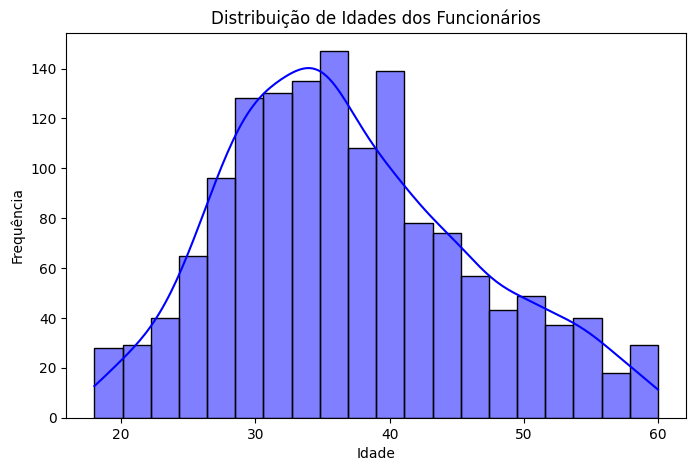

In [29]:
# 1. Distribuição das idades
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Distribuição de Idades dos Funcionários')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()
# O código acima plota um histograma mostrando a distribuição das idades dos funcionários.
# Podemos ver se há maior concentração de funcionários em certas faixas etárias.

<ipython-input-30-61fb8f796991>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department', y='JobSatisfaction', data=df, palette='Set2')


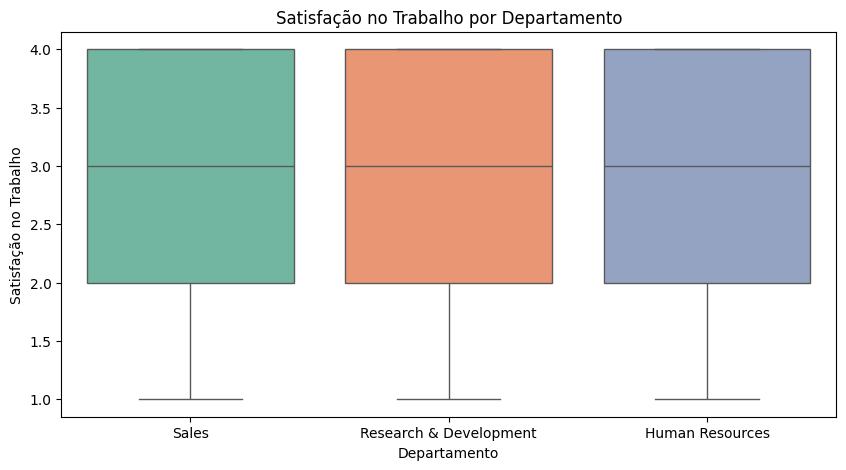

In [30]:
# 2. Comparação de satisfação no trabalho entre diferentes departamentos
plt.figure(figsize=(10, 5))
sns.boxplot(x='Department', y='JobSatisfaction', data=df, palette='Set2')
plt.title('Satisfação no Trabalho por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Satisfação no Trabalho')
plt.show()
# Esse gráfico de caixa mostra a distribuição da satisfação no trabalho por departamento.
# Podemos verificar se há um departamento onde a satisfação é consistentemente baixa, o que pode indicar problemas internos.


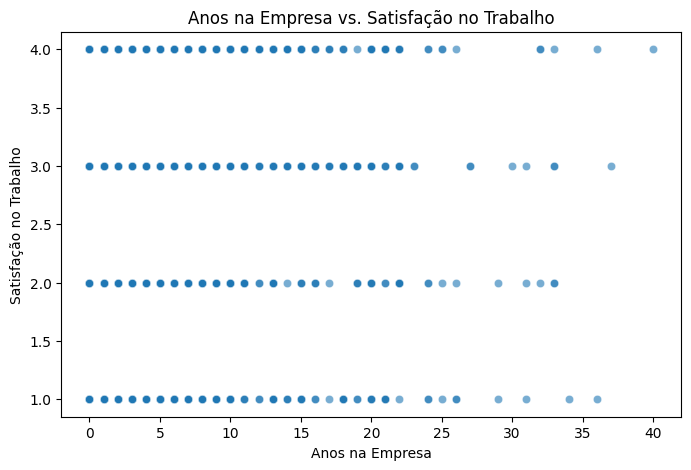

In [31]:
# 3. Relação entre anos de empresa e satisfação no trabalho
plt.figure(figsize=(8, 5))
sns.scatterplot(x='YearsAtCompany', y='JobSatisfaction', data=df, alpha=0.6)
plt.title('Anos na Empresa vs. Satisfação no Trabalho')
plt.xlabel('Anos na Empresa')
plt.ylabel('Satisfação no Trabalho')
plt.show()
# Esse gráfico de dispersão mostra se há alguma tendência entre tempo de empresa e satisfação.
# Se funcionários com mais tempo de casa tendem a ser menos satisfeitos, isso pode indicar problemas na retenção de talentos.


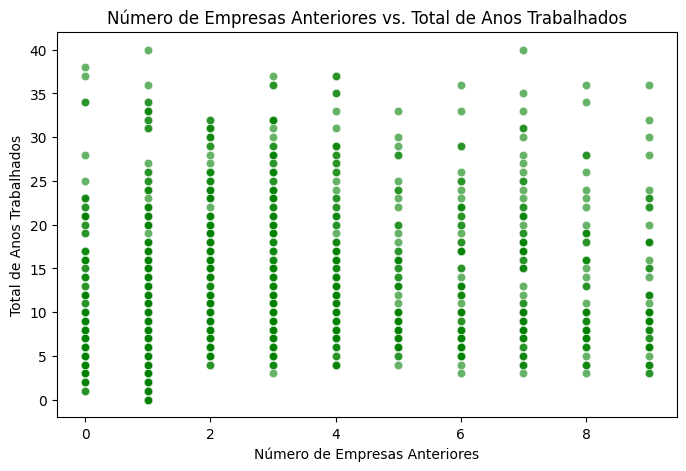

In [32]:
# 4. Relação entre número de empresas anteriores e total de anos trabalhados
plt.figure(figsize=(8, 5))
sns.scatterplot(x='NumCompaniesWorked', y='TotalWorkingYears', data=df, alpha=0.6, color='green')
plt.title('Número de Empresas Anteriores vs. Total de Anos Trabalhados')
plt.xlabel('Número de Empresas Anteriores')
plt.ylabel('Total de Anos Trabalhados')
plt.show()
# Esse gráfico verifica se funcionários que mudaram mais de empresa acumulam mais anos de experiência ou não.
# Se houver muitos funcionários com baixa experiência que já passaram por várias empresas, isso pode indicar alta rotatividade no setor.


<ipython-input-33-120883ee58a8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobSatisfaction', y='PercentSalaryHike', data=df, palette='coolwarm')


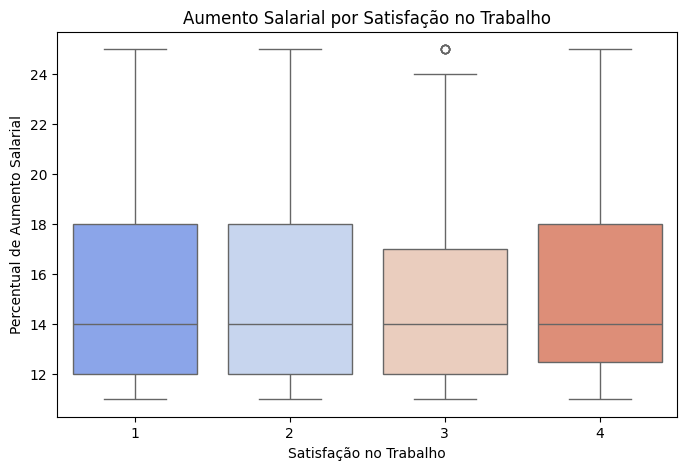

In [33]:
# 5. Comparação de aumento salarial por nível de satisfação no trabalho
plt.figure(figsize=(8, 5))
sns.boxplot(x='JobSatisfaction', y='PercentSalaryHike', data=df, palette='coolwarm')
plt.title('Aumento Salarial por Satisfação no Trabalho')
plt.xlabel('Satisfação no Trabalho')
plt.ylabel('Percentual de Aumento Salarial')
plt.show()
# Esse gráfico analisa se há uma relação entre satisfação e aumento de salário.
# Se funcionários mais satisfeitos recebem mais aumentos, a política de remuneração pode estar incentivando retenção.


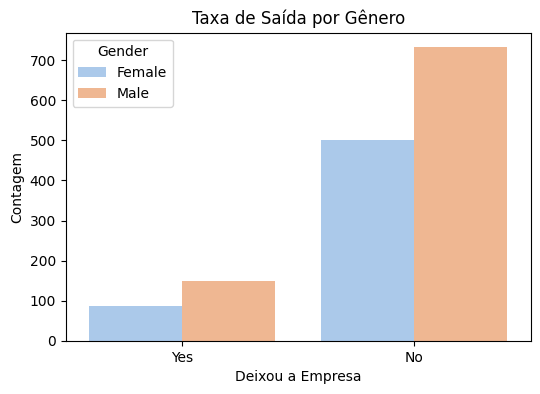

In [34]:
# 6. Comparação da taxa de saída por gênero
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', hue='Gender', data=df, palette='pastel')
plt.title('Taxa de Saída por Gênero')
plt.xlabel('Deixou a Empresa')
plt.ylabel('Contagem')
plt.show()
# Esse gráfico mostra se há diferença na taxa de saída entre homens e mulheres.
# Se um dos gêneros tiver taxa de saída muito maior, pode indicar desigualdade no ambiente de trabalho.


<ipython-input-35-1f0586c08f75>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PerformanceRating', y='WorkLifeBalance', data=df, palette='viridis')


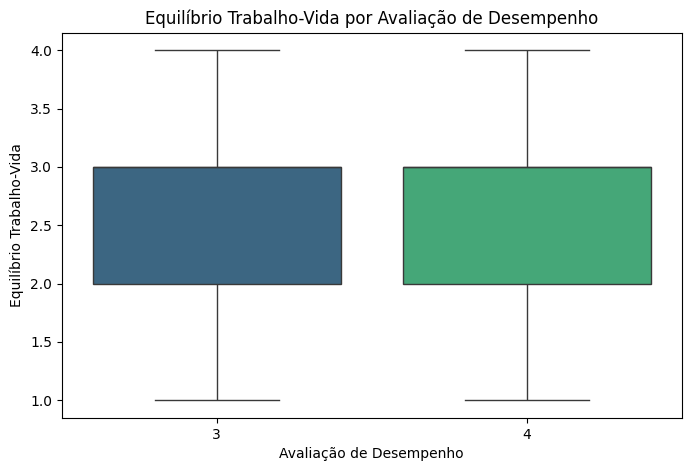

In [35]:
# 7. Work-Life Balance por Performance Rating
plt.figure(figsize=(8, 5))
sns.boxplot(x='PerformanceRating', y='WorkLifeBalance', data=df, palette='viridis')
plt.title('Equilíbrio Trabalho-Vida por Avaliação de Desempenho')
plt.xlabel('Avaliação de Desempenho')
plt.ylabel('Equilíbrio Trabalho-Vida')
plt.show()
# Esse gráfico verifica se funcionários que performam melhor têm pior equilíbrio entre vida pessoal e trabalho.
# Se funcionários com nota alta têm Work-Life Balance baixo, pode indicar que o alto desempenho vem à custa da qualidade de vida.


In [36]:
# 8. Cálculo de médias
print("Média de Idade:", df['Age'].mean())
print("Média de Anos na Empresa:", df['YearsAtCompany'].mean())
print("Média de Satisfação no Trabalho:", df['JobSatisfaction'].mean())
print("Média de Aumento Salarial (%):", df['PercentSalaryHike'].mean())
print("Média de Work-Life Balance:", df['WorkLifeBalance'].mean())
print("Média de Empresas Trabalhadas Antes:", df['NumCompaniesWorked'].mean())


Média de Idade: 36.923809523809524
Média de Anos na Empresa: 7.0081632653061225
Média de Satisfação no Trabalho: 2.7285714285714286
Média de Aumento Salarial (%): 15.209523809523809
Média de Work-Life Balance: 2.7612244897959184
Média de Empresas Trabalhadas Antes: 2.6931972789115646
